In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
#Import data file
credit_df=pd.read_csv('Entropy1.csv')
#Gather info on datafile
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Home Owner      18 non-null     object
 1   Income Bracket  18 non-null     object
 2   Credit Score    18 non-null     object
 3   Default         18 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 704.0+ bytes


In [3]:
#Display first four rows and columns
credit_df.iloc[0:4,0:4]

,Home Owner,Income Bracket,Credit Score,Default
0,Home Owner,Low,Below Average,1
1,Home Owner,Medium,Average,0
2,Not Owner,High,Average,0
3,Not Owner,Low,High,1


In [4]:
#display default colomn count
credit_df.Default.value_counts()

1    10
0     8
Name: Default, dtype: int64

In [5]:
X_features = list(credit_df.columns)
# remove default column fromdataset and segregate x features
X_features.remove('Default')
#display x feature after removing dehault column from the dataset
X_features

['Home Owner', 'Income Bracket', 'Credit Score']

In [6]:
# displaying dummies
encoded_credit_df=pd.get_dummies(credit_df[X_features],
drop_first = True)

In [7]:
#displaying dummies
list(encoded_credit_df.columns)

['Home Owner_Not Owner',
 'Income Bracket_Low',
 'Income Bracket_Medium',
 'Credit Score_Below Average',
 'Credit Score_High']

In [8]:
encoded_credit_df[['Home Owner_Not Owner',]].head(5)

,Home Owner_Not Owner
0,0
1,0
2,1
3,1
4,0


In [9]:
#staring values of x & y variable
import statsmodels.api as sm
Y= credit_df.Default
X= sm.add_constant(encoded_credit_df)

In [10]:
# creating traning and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
Y,
test_size = 0.3,
random_state = 42)

In [11]:
# define x&y and store values
Y=credit_df.Default
X=encoded_credit_df
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=42)

In [12]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [13]:
#fitting tree model
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
#predict the tree and display accuracy score
from sklearn import metrics
tree_predict = clf_tree.predict(x_test)
metrics.roc_auc_score(y_test, tree_predict)

0.8333333333333333

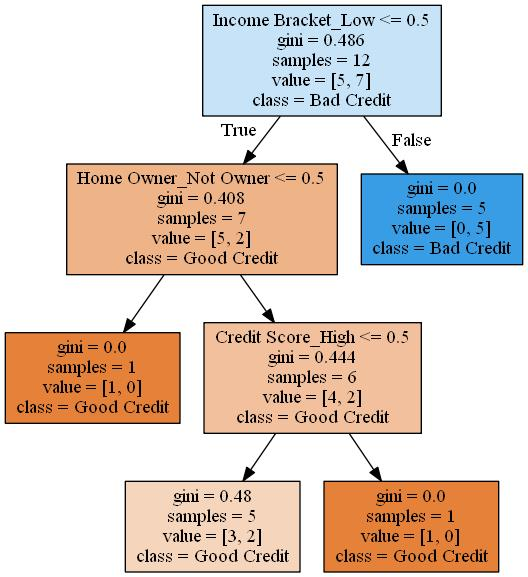

In [15]:
from sklearn.tree import export_graphviz 
import pydotplus as pdot
from IPython.display import Image 
# Export the tree into odt file
export_graphviz( clf_tree, 
out_file = "chd_tree.odt", 
feature_names = X_train.columns, 
class_names= ['Good Credit', 'Bad Credit'], 
filled = True) 
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' ) 
chd_tree_graph.write_jpg( 'chd_tree.png' ) 
# Render the png file
Image(filename='chd_tree.png')


In [39]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=c925c71ce04b6b8f9330ed9c23d4c2bc688de9094286c1c1fce724517282a06a
  Stored in directory: c:\users\sreem\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [48]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sreem\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa95532_0        14.4 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        43.7 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.11.0-py38haa95532_0




conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 1

In [17]:
import graphviz

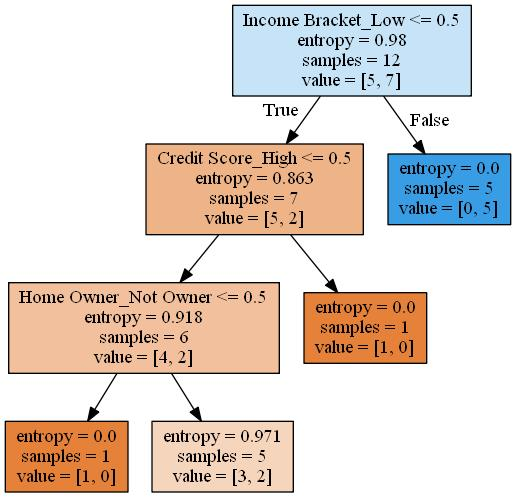

In [16]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
max_depth = 3 ) 
clf_tree_entropy.fit( X_train, y_train ) 
# Export the tree into odt file
export_graphviz( clf_tree_entropy, 
out_file = "chd_tree_entropy.odt", 
feature_names = X_train.columns, 
filled = True ) 
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' ) 
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' ) 
# Render the png file
Image(filename='chd_tree_entropy.png')
